<a href="https://colab.research.google.com/github/yoneda-kg/sparce/blob/main/ISTA%E3%83%8E%E3%82%A4%E3%82%BA%E6%9C%89%E3%82%8A%EF%BC%88%E4%BB%AE%EF%BC%89ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [ ]:
class Base:
    def __init__(self, M, N):
        self.M = M
        self.N = N
        self.A = np.hstack((np.eye(M), np.zeros((M, N-M))))

In [ ]:
class iidGaussian(Base):
    def __init__(self, M, N, m=0, v=1):
        super().__init__(M, N)
        self.A = self.set_matrix(M, N, m, v)

    def set_matrix(self, row, column, mean, var):
        """
        Return i.i.d(independent and identically distributed) Gaussian Matrix
        """
        return np.random.normal(mean, var**0.5, (row, column))

In [ ]:
def bernouli_gaussian(n, rho):
    """
    generation of signal according to Bernouli_Gaussian distribution
    """
    rand = np.random.rand(n)
    x = np.zeros((n, 1))
    for i in range(n):
        if rand[i] < rho/2:
            x[i] = norm.ppf(rand[i]/rho, loc=0, scale=1/rho**0.5)
        elif 1 - rho/2 < rand[i]:
            x[i] = norm.ppf((rand[i] - (1-rho))/rho, loc=0, scale=1/rho**0.5)
    return x

In [ ]:
def soft_threshold(x, Lambda):
    """
    soft-thresholding function
    """
    return np.maximum(np.abs(x) - Lambda, 0.0) * np.sign(x)

In [ ]:
def gauss(x):
    return np.floor(x)

In [ ]:
N=300 # 元信号ベクトル次元
M=150 # 観測ベクトル次元
sigma = 0.1 # 雑音の標準偏差
rho = 0.1 # 非零成分の割合
x = bernouli_gaussian(N, rho)
iidG = iidGaussian(M, N, 0, 1/M)
max_itr=50 # ISTAの反復回数
Lambda=0.5

n=np.random.normal(0, sigma**2, (M, 1))
y=np.dot(iidG.A, x) +n # 観測信号の生成
A_T=np.transpose(iidG.A)
x_t=np.dot(A_T, y)
L=np.linalg.norm(A_T.dot(iidG.A),ord=2)/Lambda # Lipschitz constant
MSE=[]
NMSE_x0=[]
NMSE_x0.append(np.mean(x-0)**2)

for i in range(max_itr):
  x_t=soft_threshold(x_t+np.dot(A_T, y-np.dot(iidG.A, x_t))/(L*Lambda), 1/L)
  MSE.append(np.mean(x_t-x)**2)

In [ ]:
f=[]
NMESE=[]

f=np.log10(np.divide(MSE, NMSE_x0))
NMSE=10*gauss(f)
print(NMSE)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10.]


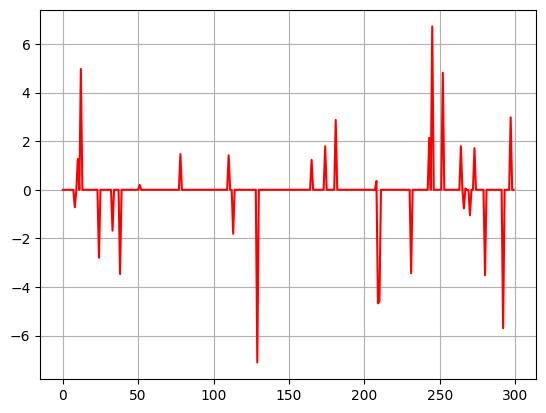

In [ ]:
plt.grid()
plt.plot(x, color="red")

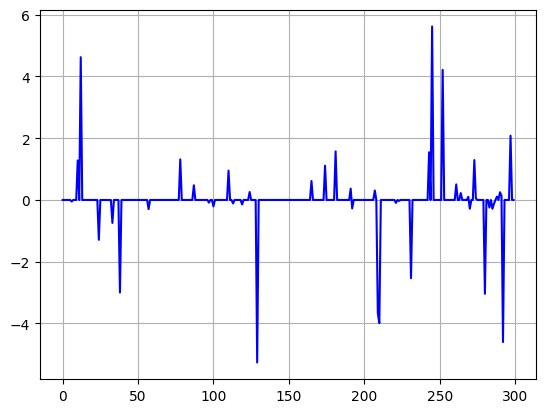

In [ ]:
plt.grid()
plt.plot(x_t, color="blue")

Text(0, 0.5, 'x')

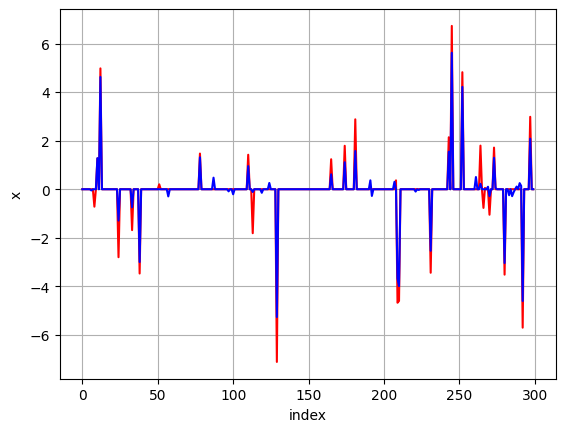

In [ ]:
plt.grid()
plt.plot(x, color="red")
plt.plot(x_t, color="blue")
plt.xlabel("index")
plt.ylabel("x")

Text(0, 0.5, 'MSE')

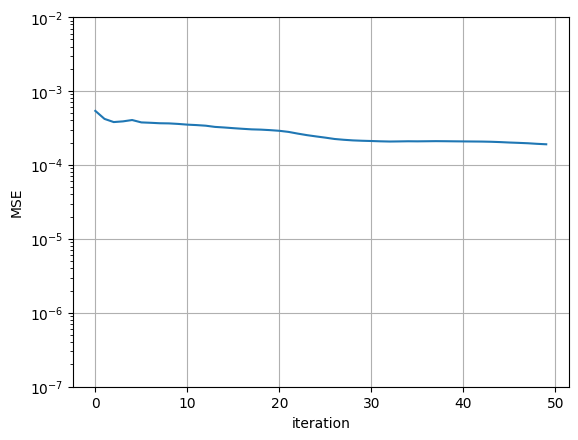

In [ ]:
Figure, ax = plt.subplots()#グラフオブジェクトを生成
plt.grid()
plt.yscale('log')
plt.plot(MSE)
ax.set_ylim([0.0000001,0.01])
plt.xlabel("iteration")
plt.ylabel("MSE")

Text(0, 0.5, 'NMSE')

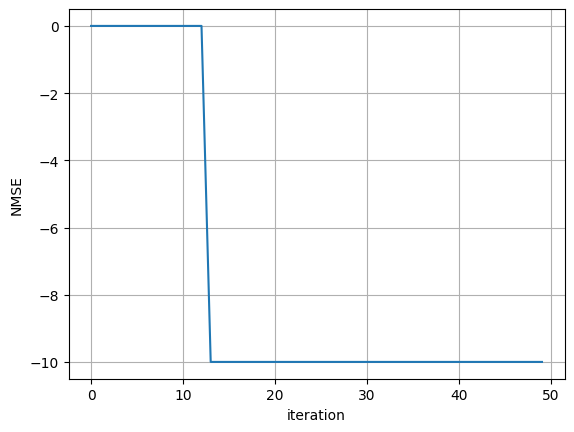

In [ ]:
Figure, ax = plt.subplots()#グラフオブジェクトを生成
plt.grid()
plt.plot(NMSE)
plt.xlabel("iteration")
plt.ylabel("NMSE")